In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
%matplotlib inline
plt.rcParams["figure.figsize"]=(10,8)
plt.rcParams['figure.dpi']=720
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [4]:
df.shape

(1436, 11)

In [5]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
# check duplicates

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated(keep=False)]

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
112  24950          8  13253    Diesel  116          0  2000      5   
113  24950          8  13253    Diesel  116          0  2000      5   

     Cylinders  Gears  Weight  
112          4      5    1320  
113          4      5    1320

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1435, 11)

In [12]:
#check null values

In [13]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

<Axes: >

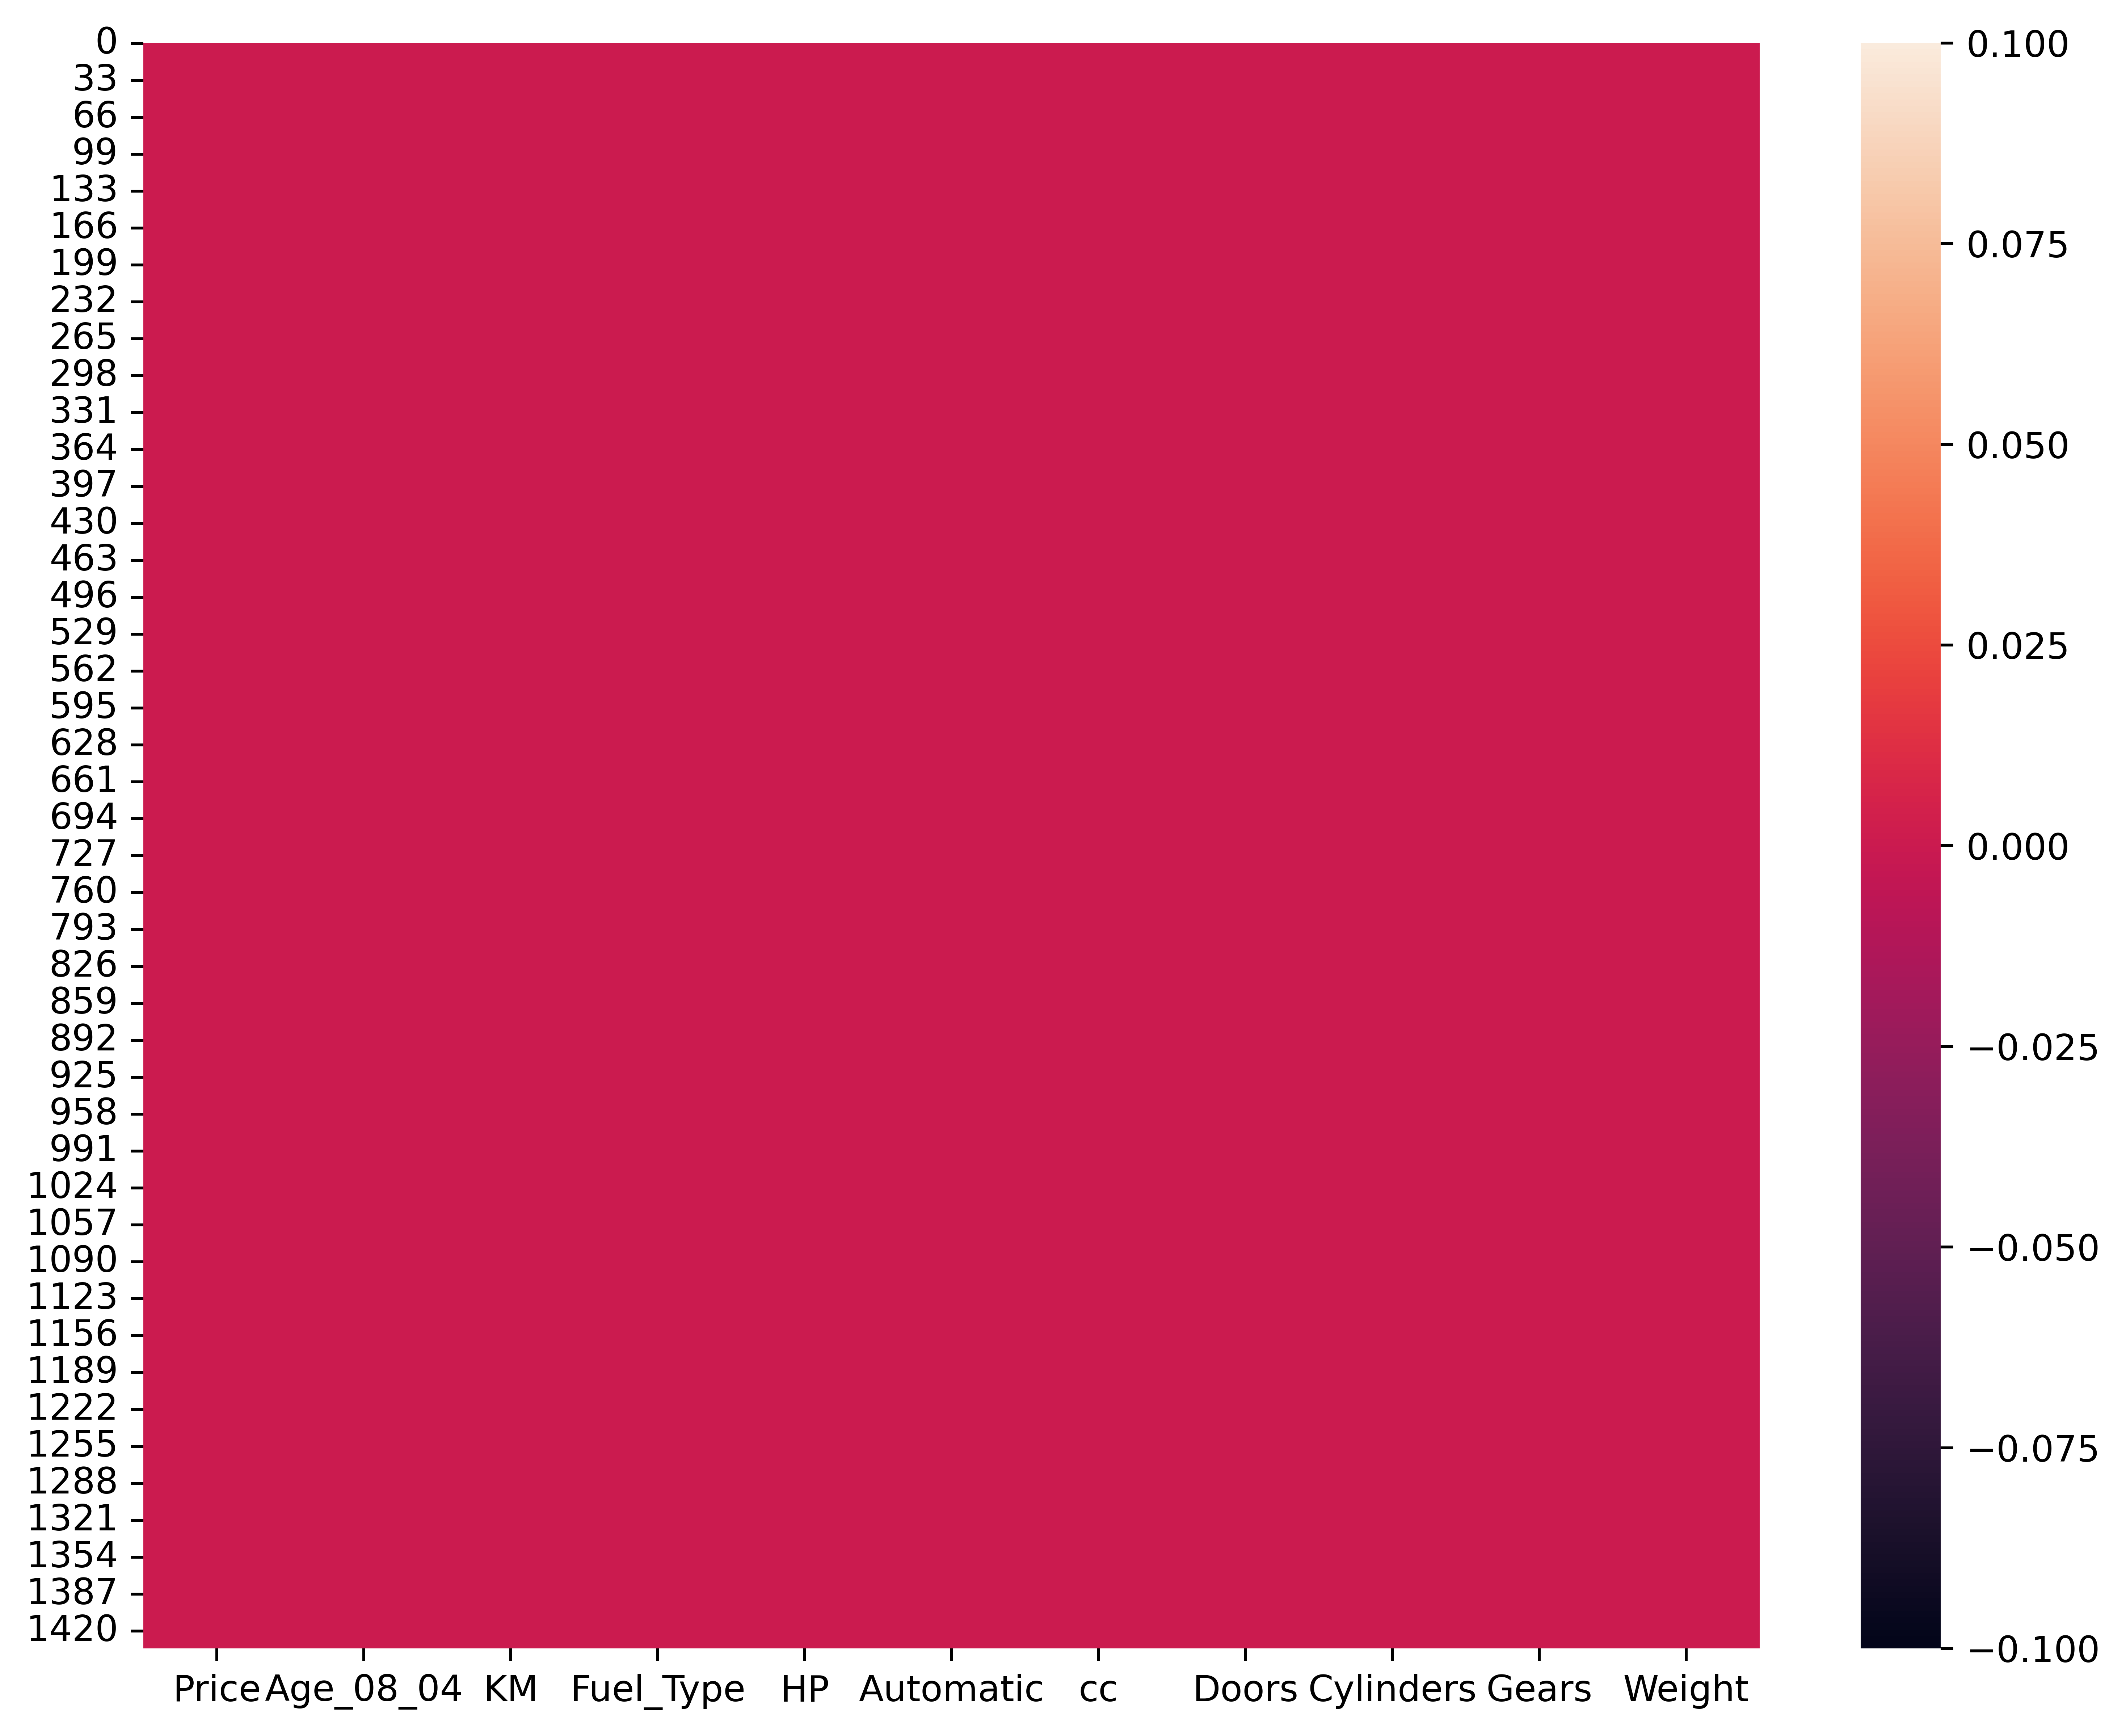

In [14]:
sns.heatmap(df.isna())

In [15]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [16]:
# converting categorical column to numerical

In [17]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64

In [18]:
df_=pd.get_dummies(df).astype(int)

In [19]:
df_

Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0       1165              0                 1                 0  
1       1165              0                 1                 0  
2       1165              0                 1                 0  
3       1165              0                 1                 0  
4       1170              0                 1                 0  
...      ...            ...               ...               ...  
1431    1025              0                 0                 1  
1432    1015              0                 0                 1  
1433    1015              0                 0                 1  
1434    1015              0                 0                 1  
1435    1114              0                 0                 1  

[1435 rows x 13 columns]

In [20]:
df_['Cylinders'].unique()

array([4])

In [21]:
df_.drop(columns=['Cylinders'],inplace=True)

In [22]:
df_

Price  Age_08_04     KM   HP  Automatic    cc  Doors  Gears  Weight  \
0     13500         23  46986   90          0  2000      3      5    1165   
1     13750         23  72937   90          0  2000      3      5    1165   
2     13950         24  41711   90          0  2000      3      5    1165   
3     14950         26  48000   90          0  2000      3      5    1165   
4     13750         30  38500   90          0  2000      3      5    1170   
...     ...        ...    ...  ...        ...   ...    ...    ...     ...   
1431   7500         69  20544   86          0  1300      3      5    1025   
1432  10845         72  19000   86          0  1300      3      5    1015   
1433   8500         71  17016   86          0  1300      3      5    1015   
1434   7250         70  16916   86          0  1300      3      5    1015   
1435   6950         76      1  110          0  1600      5      5    1114   

      Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0                 0                 1                 0  
1                 0                 1                 0  
2                 0                 1                 0  
3                 0                 1                 0  
4                 0                 1                 0  
...             ...               ...               ...  
1431              0                 0                 1  
1432              0                 0                 1  
1433              0                 0                 1  
1434              0                 0                 1  
1435              0                 0                 1  

[1435 rows x 12 columns]

In [23]:
# standardization/normalization

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [25]:
sc=StandardScaler()
sc_df=sc.fit_transform(df_)

In [26]:
sc_df

array([[ 0.77036821, -1.77726827, -0.57595832, ..., -0.109493  ,
         2.88412583, -2.71878886],
       [ 0.83966875, -1.77726827,  0.11647404, ..., -0.109493  ,
         2.88412583, -2.71878886],
       [ 0.89510918, -1.72337979, -0.71670745, ..., -0.109493  ,
         2.88412583, -2.71878886],
       ...,
       [-0.61564265,  0.80937864, -1.37562683, ..., -0.109493  ,
        -0.34672551,  0.36781083],
       [-0.96214536,  0.75549016, -1.37829506, ..., -0.109493  ,
        -0.34672551,  0.36781083],
       [-1.04530601,  1.07882103, -1.82962616, ..., -0.109493  ,
        -0.34672551,  0.36781083]])

In [27]:
sc_df_final=pd.DataFrame(sc_df,columns=df_.columns)

In [28]:
sc_df_final

Price  Age_08_04        KM        HP  Automatic        cc     Doors  \
0     0.770368  -1.777268 -0.575958 -0.767351  -0.242983  0.998113 -1.084443   
1     0.839669  -1.777268  0.116474 -0.767351  -0.242983  0.998113 -1.084443   
2     0.895109  -1.723380 -0.716707 -0.767351  -0.242983  0.998113 -1.084443   
3     1.172311  -1.615603 -0.548902 -0.767351  -0.242983  0.998113 -1.084443   
4     0.839669  -1.400049 -0.802384 -0.767351  -0.242983  0.998113 -1.084443   
...        ...        ...       ...       ...        ...       ...       ...   
1430 -0.892845   0.701602 -1.281492 -1.034441  -0.242983 -0.651898 -1.084443   
1431  0.034396   0.863267 -1.322689 -1.034441  -0.242983 -0.651898 -1.084443   
1432 -0.615643   0.809379 -1.375627 -1.034441  -0.242983 -0.651898 -1.084443   
1433 -0.962145   0.755490 -1.378295 -1.034441  -0.242983 -0.651898 -1.084443   
1434 -1.045306   1.078821 -1.829626  0.568103  -0.242983  0.055249  1.015659   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    -0.140475  1.774964      -0.109493          2.884126         -2.718789  
1    -0.140475  1.774964      -0.109493          2.884126         -2.718789  
2    -0.140475  1.774964      -0.109493          2.884126         -2.718789  
3    -0.140475  1.774964      -0.109493          2.884126         -2.718789  
4    -0.140475  1.870688      -0.109493          2.884126         -2.718789  
...        ...       ...            ...               ...               ...  
1430 -0.140475 -0.905299      -0.109493         -0.346726          0.367811  
1431 -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
1432 -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
1433 -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
1434 -0.140475  0.798582      -0.109493         -0.346726          0.367811  

[1435 rows x 12 columns]

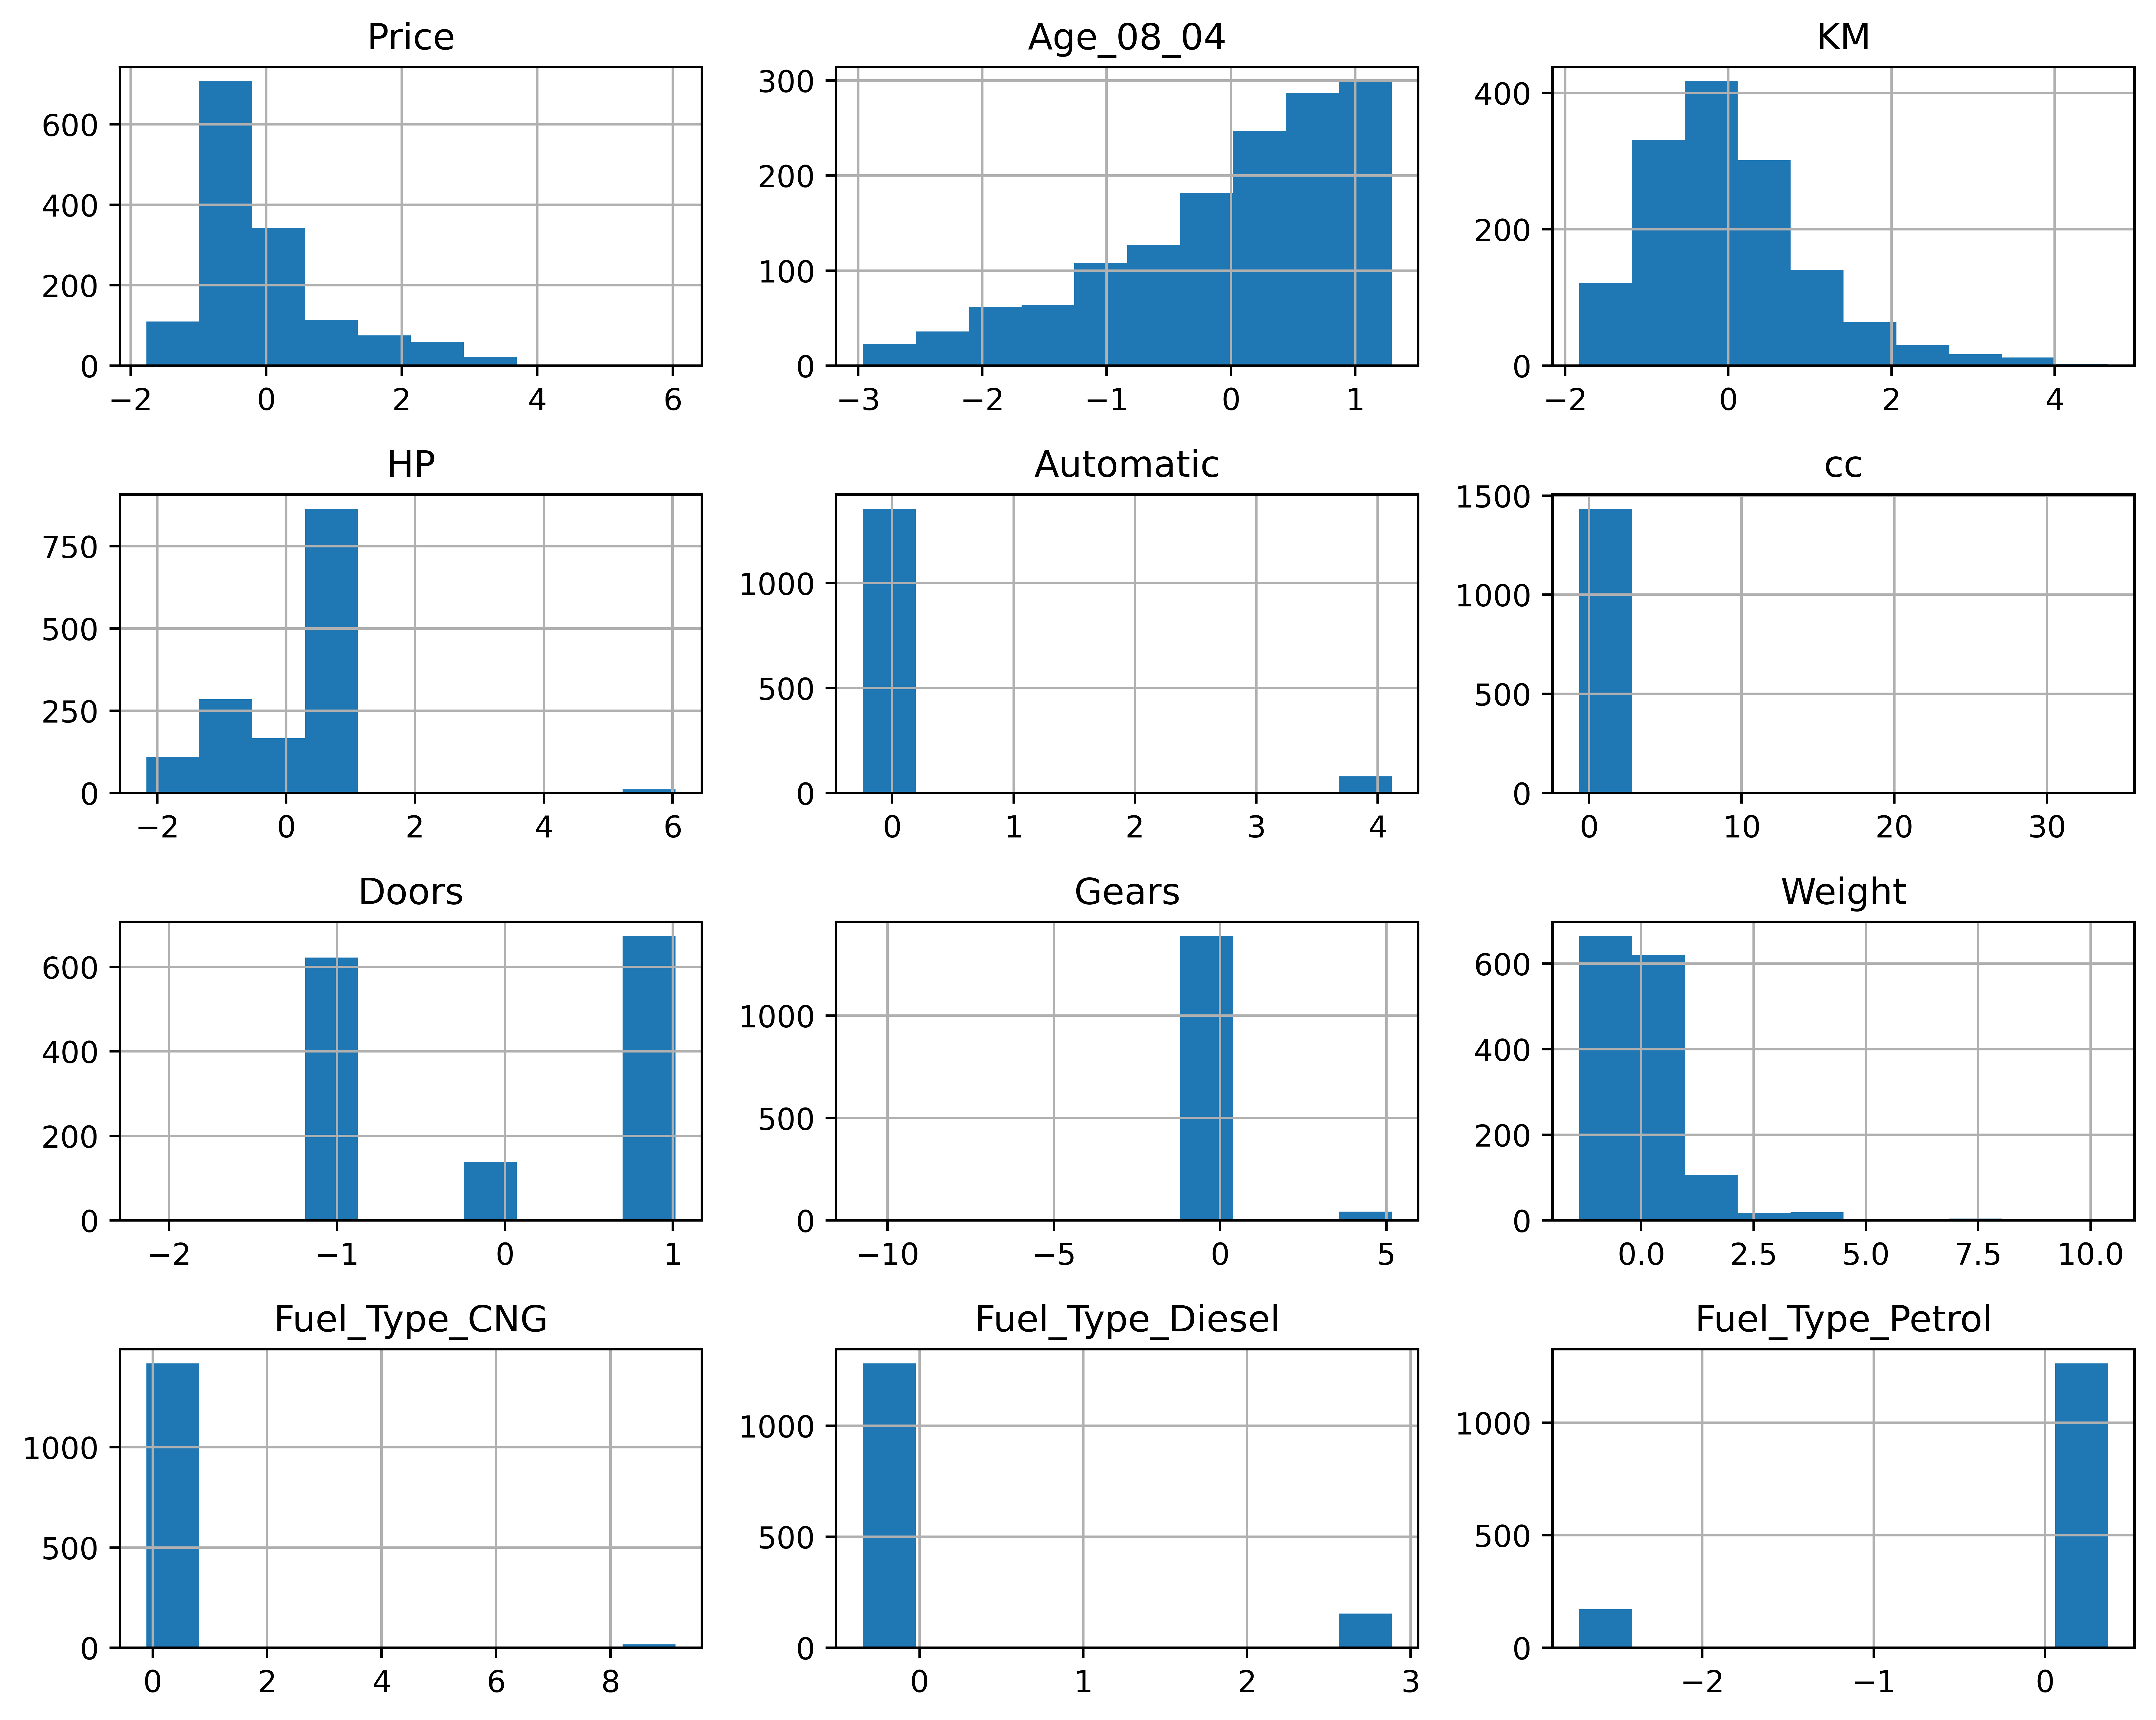

In [29]:
sc_df_final.hist()
plt.tight_layout()
plt.show()

<Axes: >

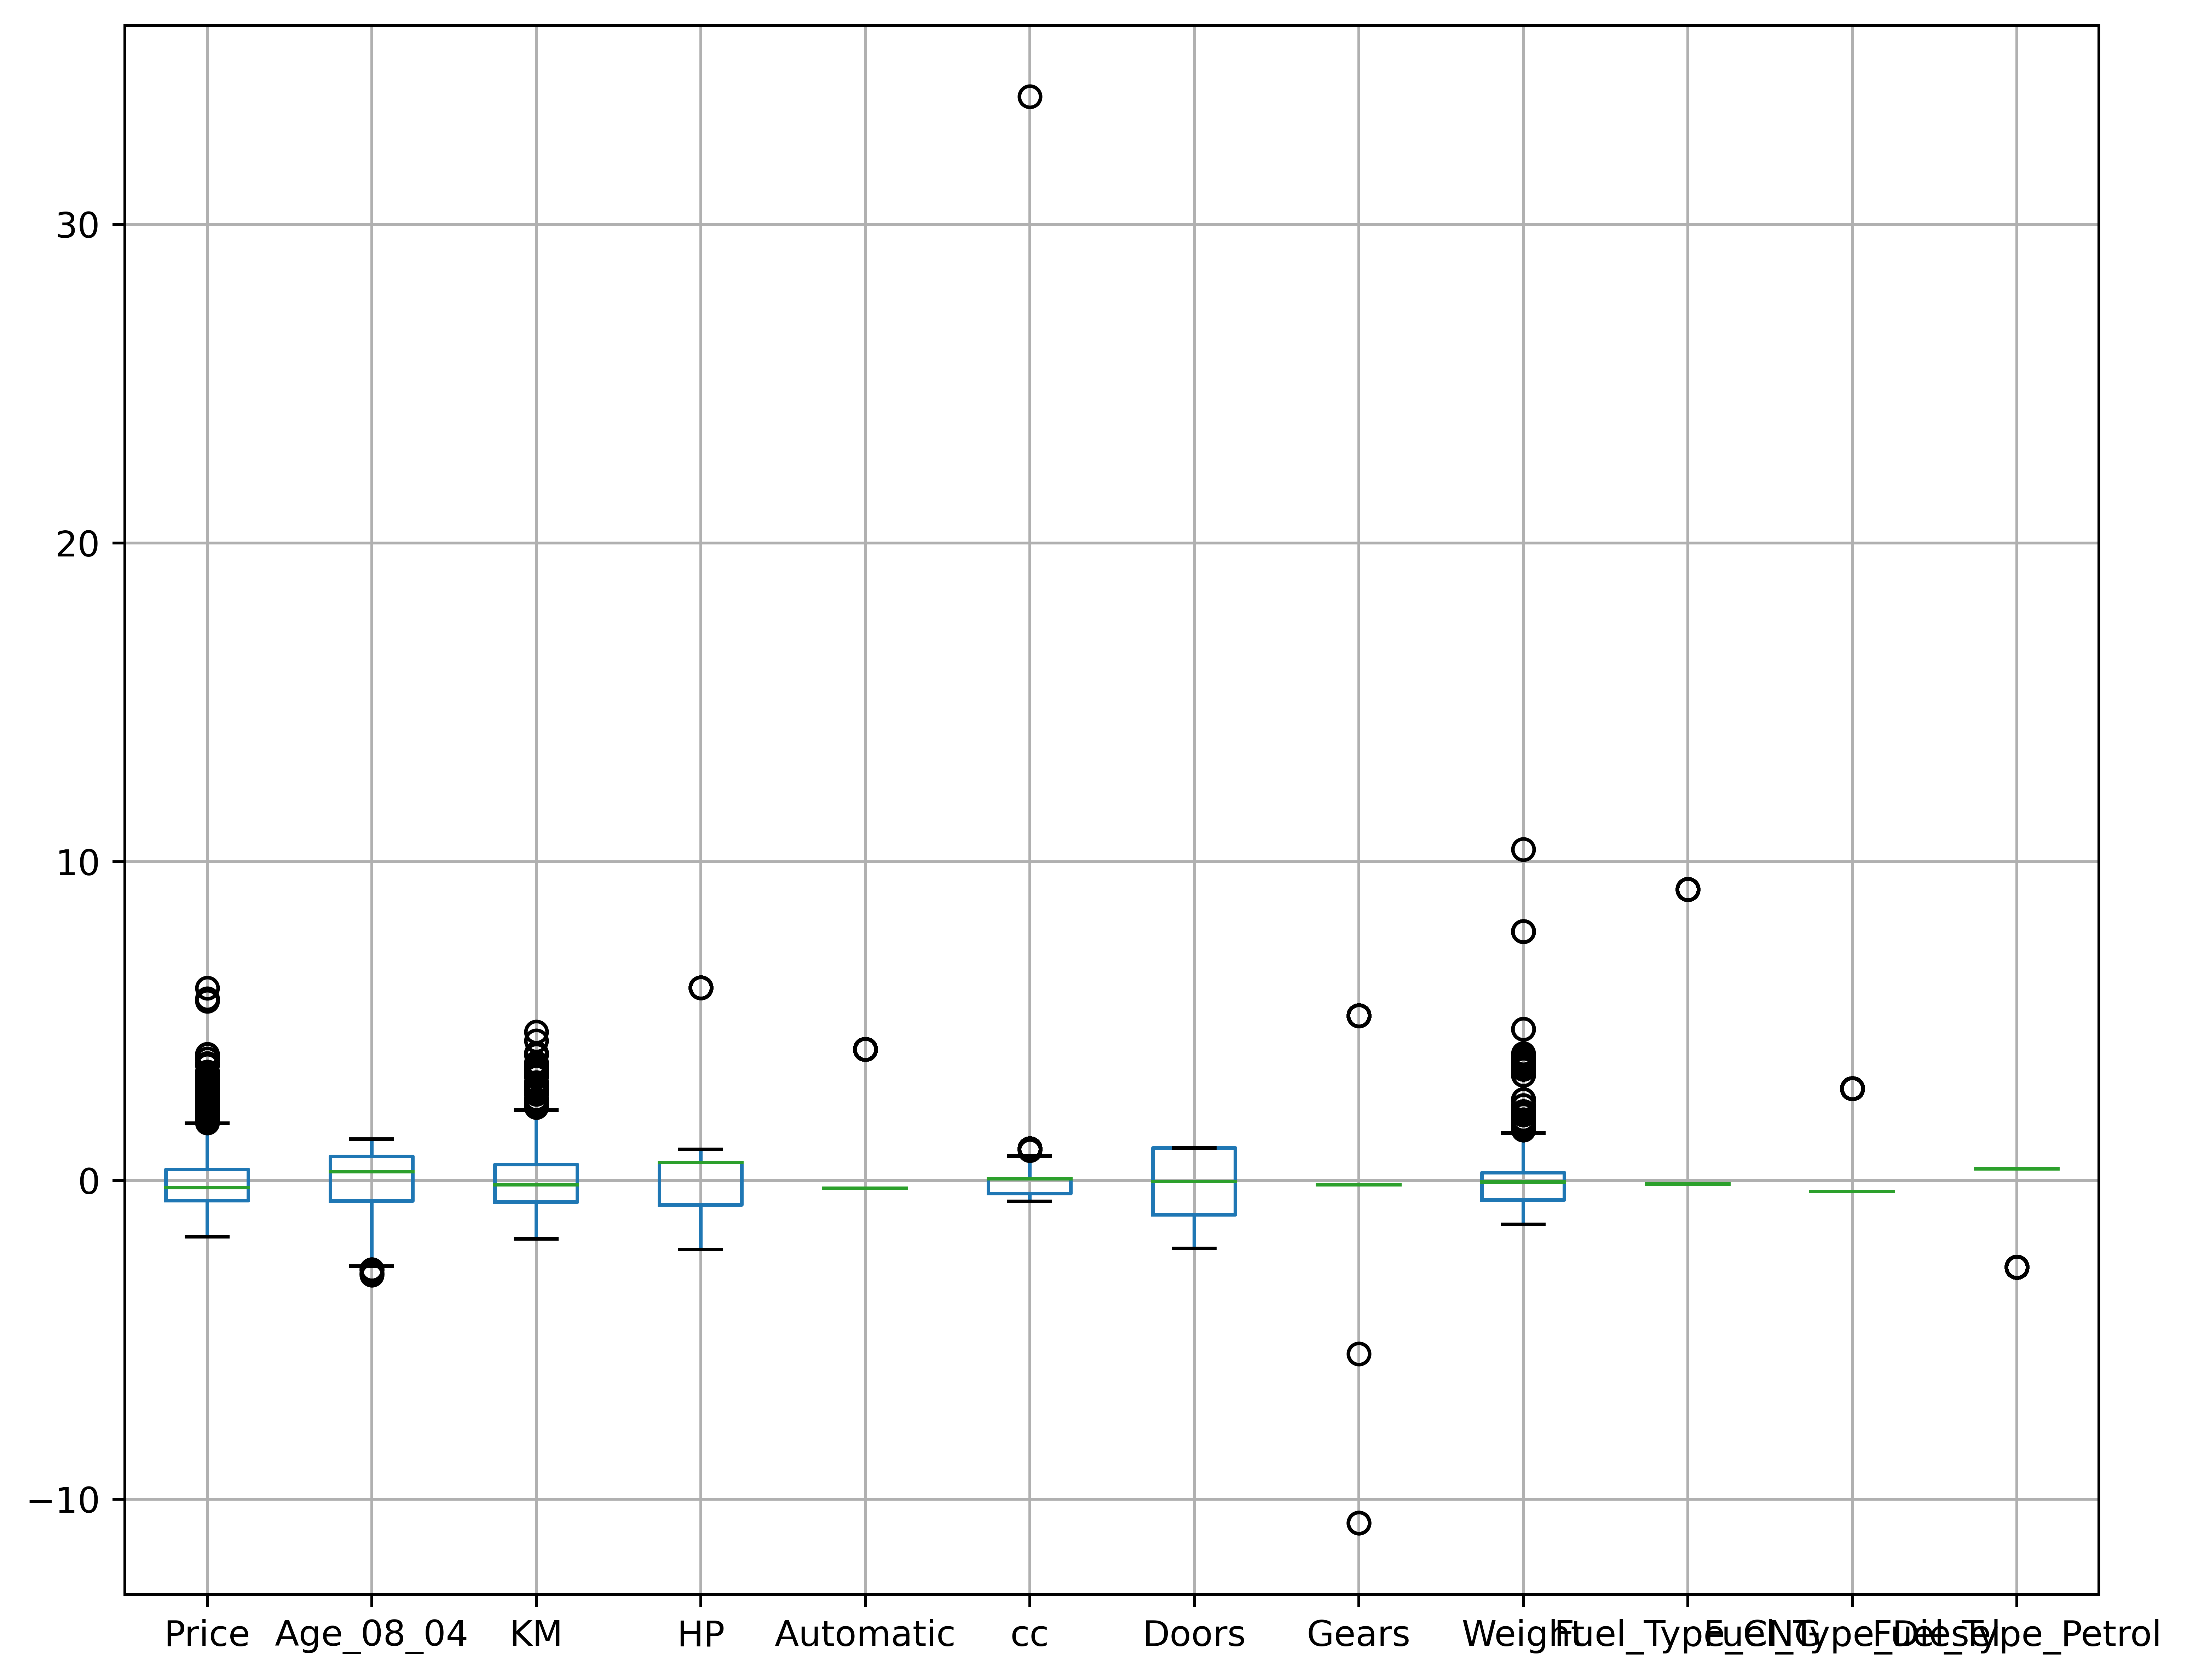

In [30]:
sc_df_final.boxplot()

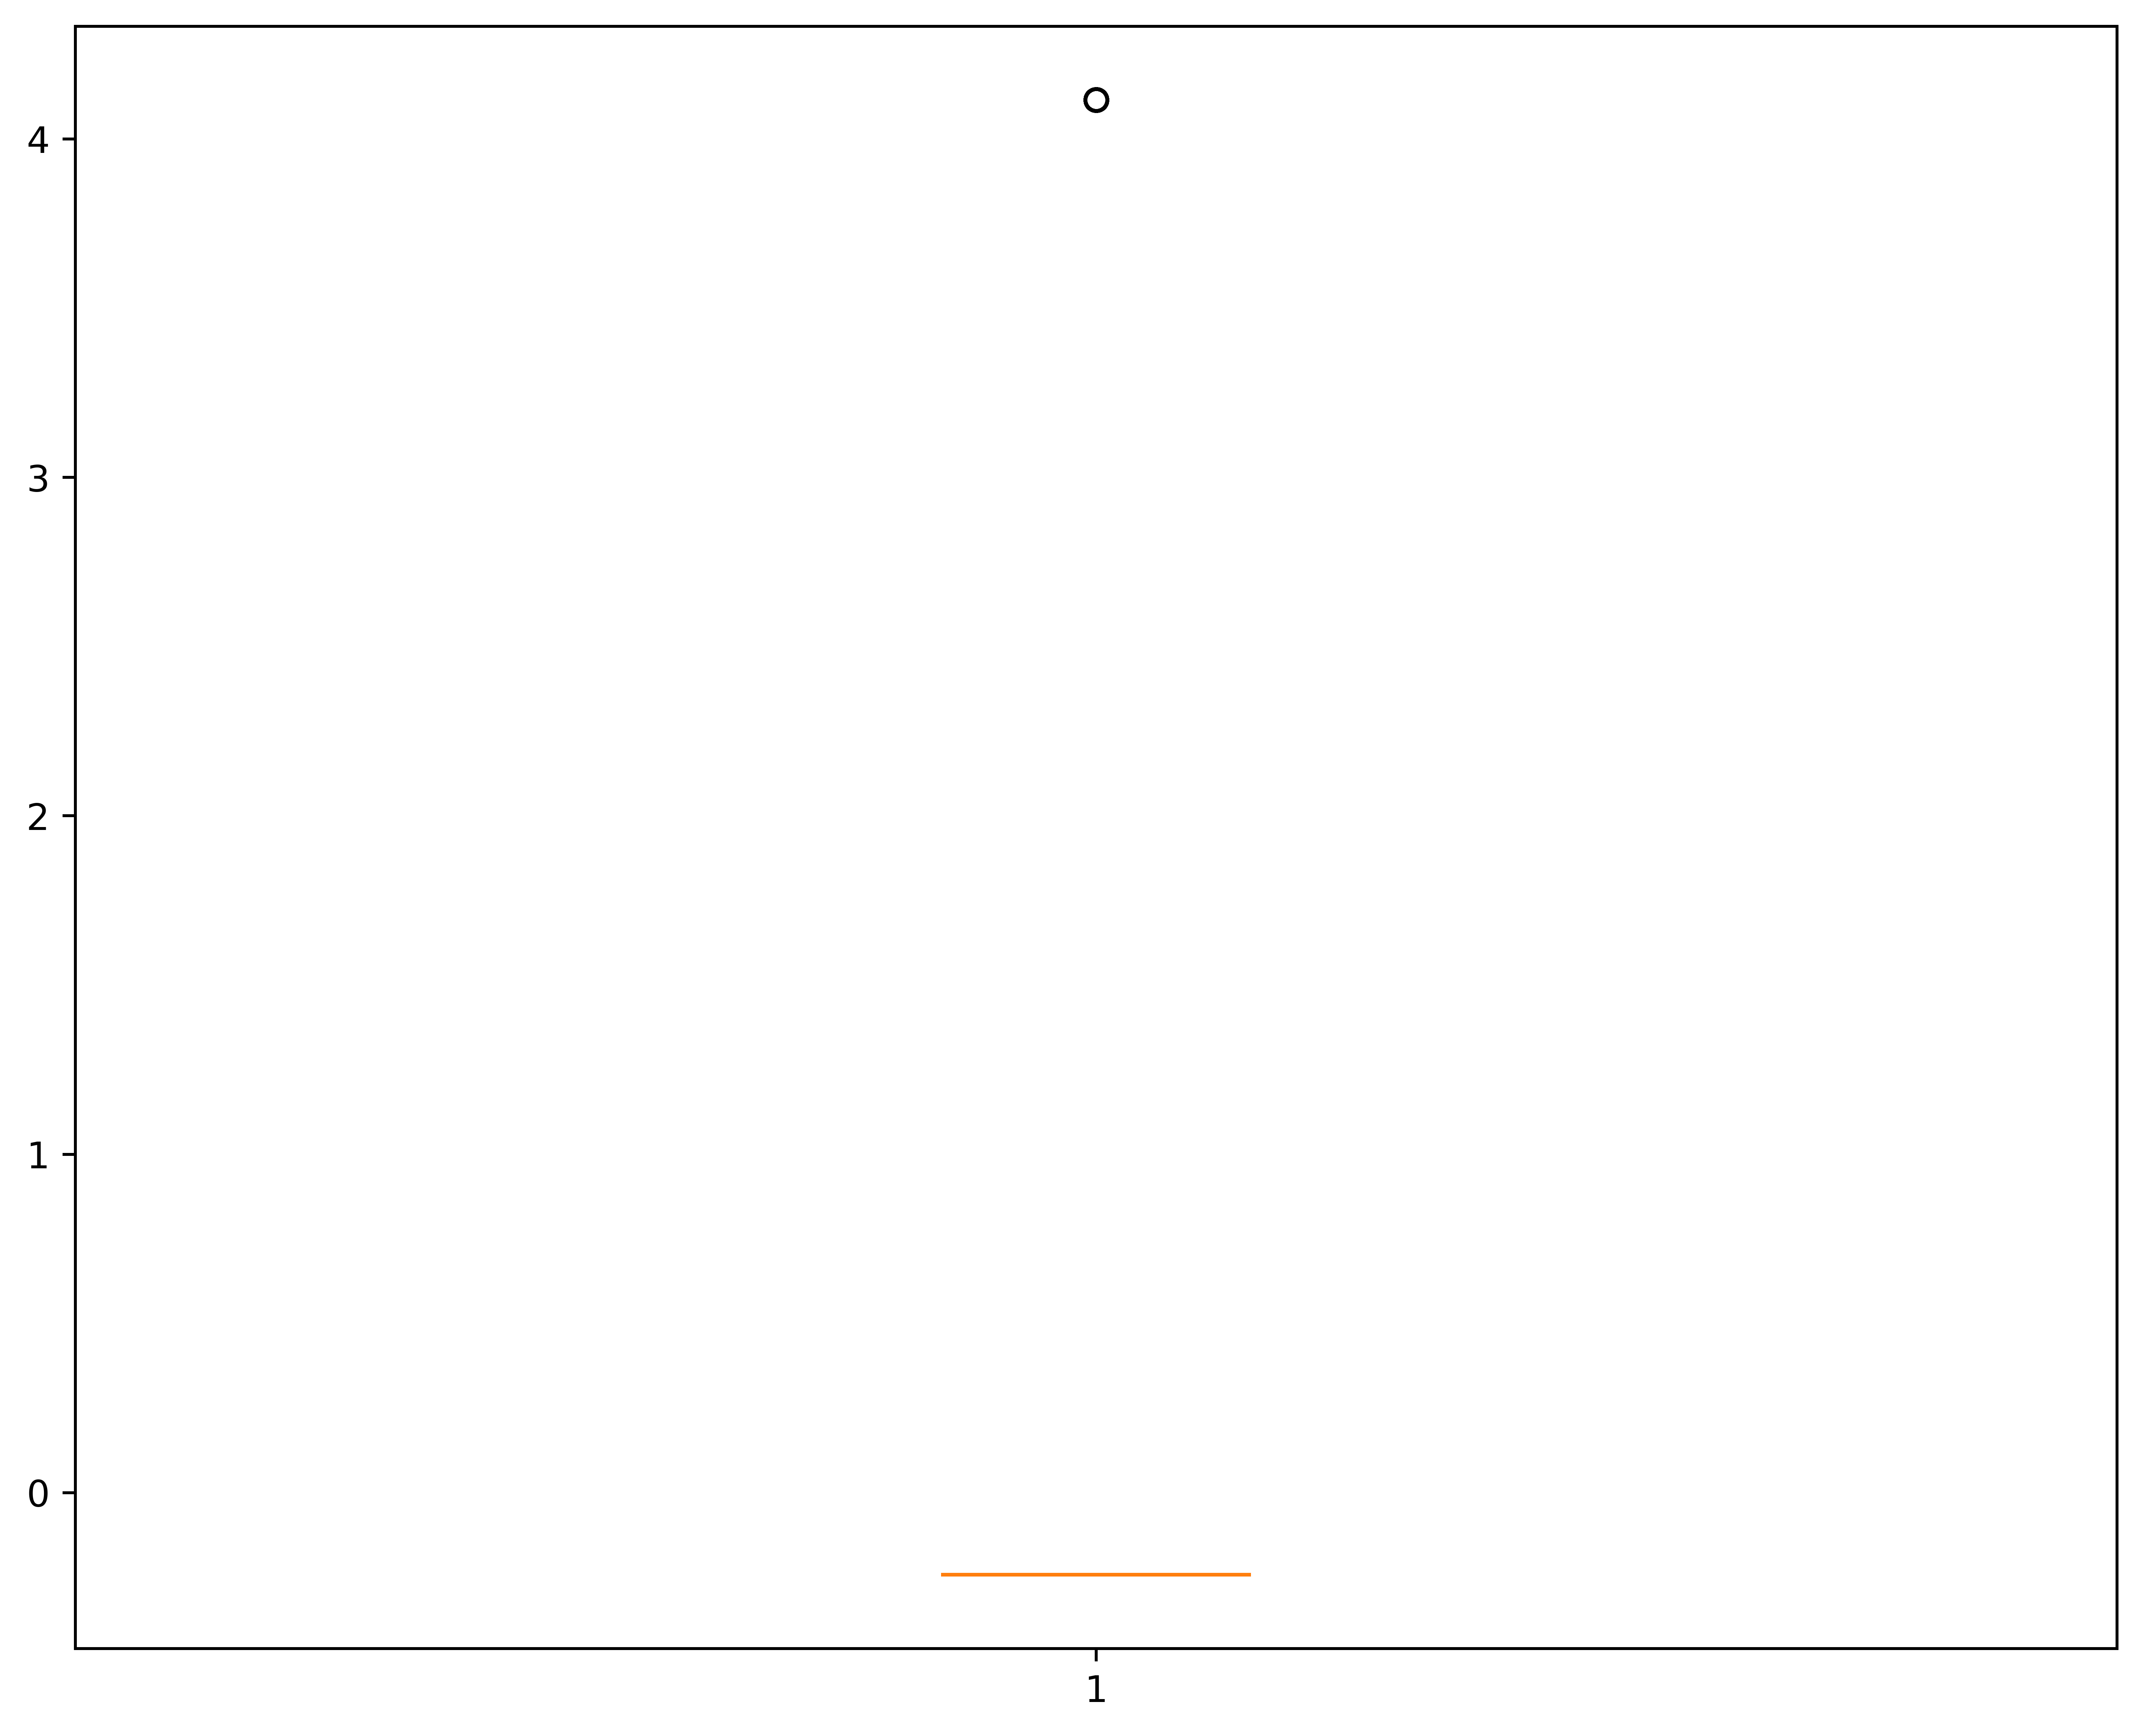

In [31]:
plt.boxplot(sc_df_final['Automatic'])
plt.show()

In [32]:
def outlier_detection(data,colname):
  q1=data[colname].quantile(0.25)
  q2=data[colname].quantile(0.75)
  iqr=q2-q1

  upper_extr=q2+(iqr*1.5)
  lower_extr=q1-(iqr*1.5)
  return upper_extr,lower_extr

In [33]:
outlier_detection(sc_df_final,'Price')

(1.796016236453014, -2.0848141504215727)

In [34]:
sc_df_final.loc[sc_df_final['Price']>1.79,'price']=1.79

In [35]:
sc_df_final[sc_df_final['Price']==1.79]

Empty DataFrame
Columns: [Price, Age_08_04, KM, HP, Automatic, cc, Doors, Gears, Weight, Fuel_Type_CNG, Fuel_Type_Diesel, Fuel_Type_Petrol, price]
Index: []

In [36]:
outlier_detection(sc_df_final,'Age_08_04')

(2.857140777872961, -2.7472608583632647)

In [37]:
sc_df_final.loc[sc_df_final['Age_08_04']<-2.26,'Age_08_04']=-2.26

In [38]:
outlier_detection(sc_df_final,'KM')

(2.255507273935951, -2.445006703675039)

In [39]:
sc_df_final.loc[sc_df_final['KM']>2.82,'KM']=-2.262

In [40]:
outlier_detection(sc_df_final,'HP')

(2.5712829514328623, -2.770530740897665)

In [41]:
sc_df_final.loc[sc_df_final['HP']>2.57,'HP']=2.57

In [42]:
outlier_detection(sc_df_final,'Automatic')

(-0.24298269569231482, -0.24298269569231482)

In [43]:
#sc_df_final.loc[sc_df_final['Automatic']>-2.24,'Automatic']=-2.24

In [44]:
outlier_detection(sc_df_final,'cc')

(0.7623969956414857, -1.1233296808565707)

In [45]:
sc_df_final.loc[sc_df_final['cc']>0.76,'cc']=0.76

In [46]:
outlier_detection(sc_df_final,'Gears')

(-0.14047507206961815, -0.14047507206961815)

In [47]:
sc_df_final.loc[sc_df_final['Gears']>-0.14,'cc']=-0.14

In [48]:
#sc_df_final.loc[sc_df_final['Gears']<-0.14,'cc']=-0.14

In [49]:
outlier_detection(sc_df_final,'Weight')

(1.535654825785275, -1.9103980691705411)

In [50]:
sc_df_final.loc[sc_df_final['Weight']>1.53,'Weight']=1.53

In [51]:
outlier_detection(sc_df_final,'Fuel_Type_CNG')

(-0.10949299750265154, -0.10949299750265154)

In [52]:
#sc_df_final.loc[sc_df_final['Fuel_Type_CNG']>-0.10,'Fuel_Type_CNG']=-0.10

In [53]:
outlier_detection(sc_df_final,'Fuel_Type_Diesel')

(-0.3467255099282034, -0.3467255099282034)

In [54]:
#sc_df_final.loc[sc_df_final['Fuel_Type_CNG']>-0.34,'Fuel_Type_CNG']=-0.34

In [55]:
outlier_detection(sc_df_final,'Fuel_Type_Petrol')

(0.36781083470526316, 0.36781083470526316)

In [56]:
#sc_df_final.loc[sc_df_final['Fuel_Type_CNG']>0.36,'Fuel_Type_CNG']=0.36

In [57]:
sc_df_final.corr()

Price  Age_08_04        KM        HP  Automatic  \
Price             1.000000  -0.868676 -0.488911  0.265728   0.033928   
Age_08_04        -0.868676   1.000000  0.479666 -0.128507   0.030396   
KM               -0.488911   0.479666  1.000000 -0.166941  -0.059750   
HP                0.265728  -0.128507 -0.166941  1.000000   0.022545   
Automatic         0.033928   0.030396 -0.059750  0.022545   1.000000   
cc                0.147478  -0.128174  0.114084  0.065650  -0.056691   
Doors             0.183604  -0.143263 -0.030042  0.120149  -0.027492   
Gears             0.063831  -0.007018  0.032691  0.140745  -0.098582   
Weight            0.534586  -0.474136 -0.106065  0.024780   0.090542   
Fuel_Type_CNG    -0.039449   0.001263  0.090680  0.074212   0.001467   
Fuel_Type_Diesel  0.046612  -0.091026  0.162982 -0.601600  -0.084248   
Fuel_Type_Petrol -0.031356   0.086540 -0.185988  0.549956   0.079997   
price                  NaN        NaN       NaN       NaN        NaN   

                        cc     Doors     Gears    Weight  Fuel_Type_CNG  \
Price             0.147478  0.183604  0.063831  0.534586      -0.039449   
Age_08_04        -0.128174 -0.143263 -0.007018 -0.474136       0.001263   
KM                0.114084 -0.030042  0.032691 -0.106065       0.090680   
HP                0.065650  0.120149  0.140745  0.024780       0.074212   
Automatic        -0.056691 -0.027492 -0.098582  0.090542       0.001467   
cc                1.000000  0.156004 -0.041048  0.703154       0.026054   
Doors             0.156004  1.000000 -0.160101  0.381455       0.009761   
Gears            -0.041048 -0.160101  1.000000  0.020029      -0.049548   
Weight            0.703154  0.381455  0.020029  1.000000       0.085189   
Fuel_Type_CNG     0.026054  0.009761 -0.049548  0.085189       1.000000   
Fuel_Type_Diesel  0.708165  0.023538 -0.048706  0.574499      -0.037964   
Fuel_Type_Petrol -0.685248 -0.025746  0.063079 -0.577298      -0.297688   
price                  NaN       NaN       NaN       NaN            NaN   

                  Fuel_Type_Diesel  Fuel_Type_Petrol  price  
Price                     0.046612         -0.031356    NaN  
Age_08_04                -0.091026          0.086540    NaN  
KM                        0.162982         -0.185988    NaN  
HP                       -0.601600          0.549956    NaN  
Automatic                -0.084248          0.079997    NaN  
cc                        0.708165         -0.685248    NaN  
Doors                     0.023538         -0.025746    NaN  
Gears                    -0.048706          0.063079    NaN  
Weight                    0.574499         -0.577298    NaN  
Fuel_Type_CNG            -0.037964         -0.297688    NaN  
Fuel_Type_Diesel          1.000000         -0.942673    NaN  
Fuel_Type_Petrol         -0.942673          1.000000    NaN  
price                          NaN               NaN    NaN

<Axes: >

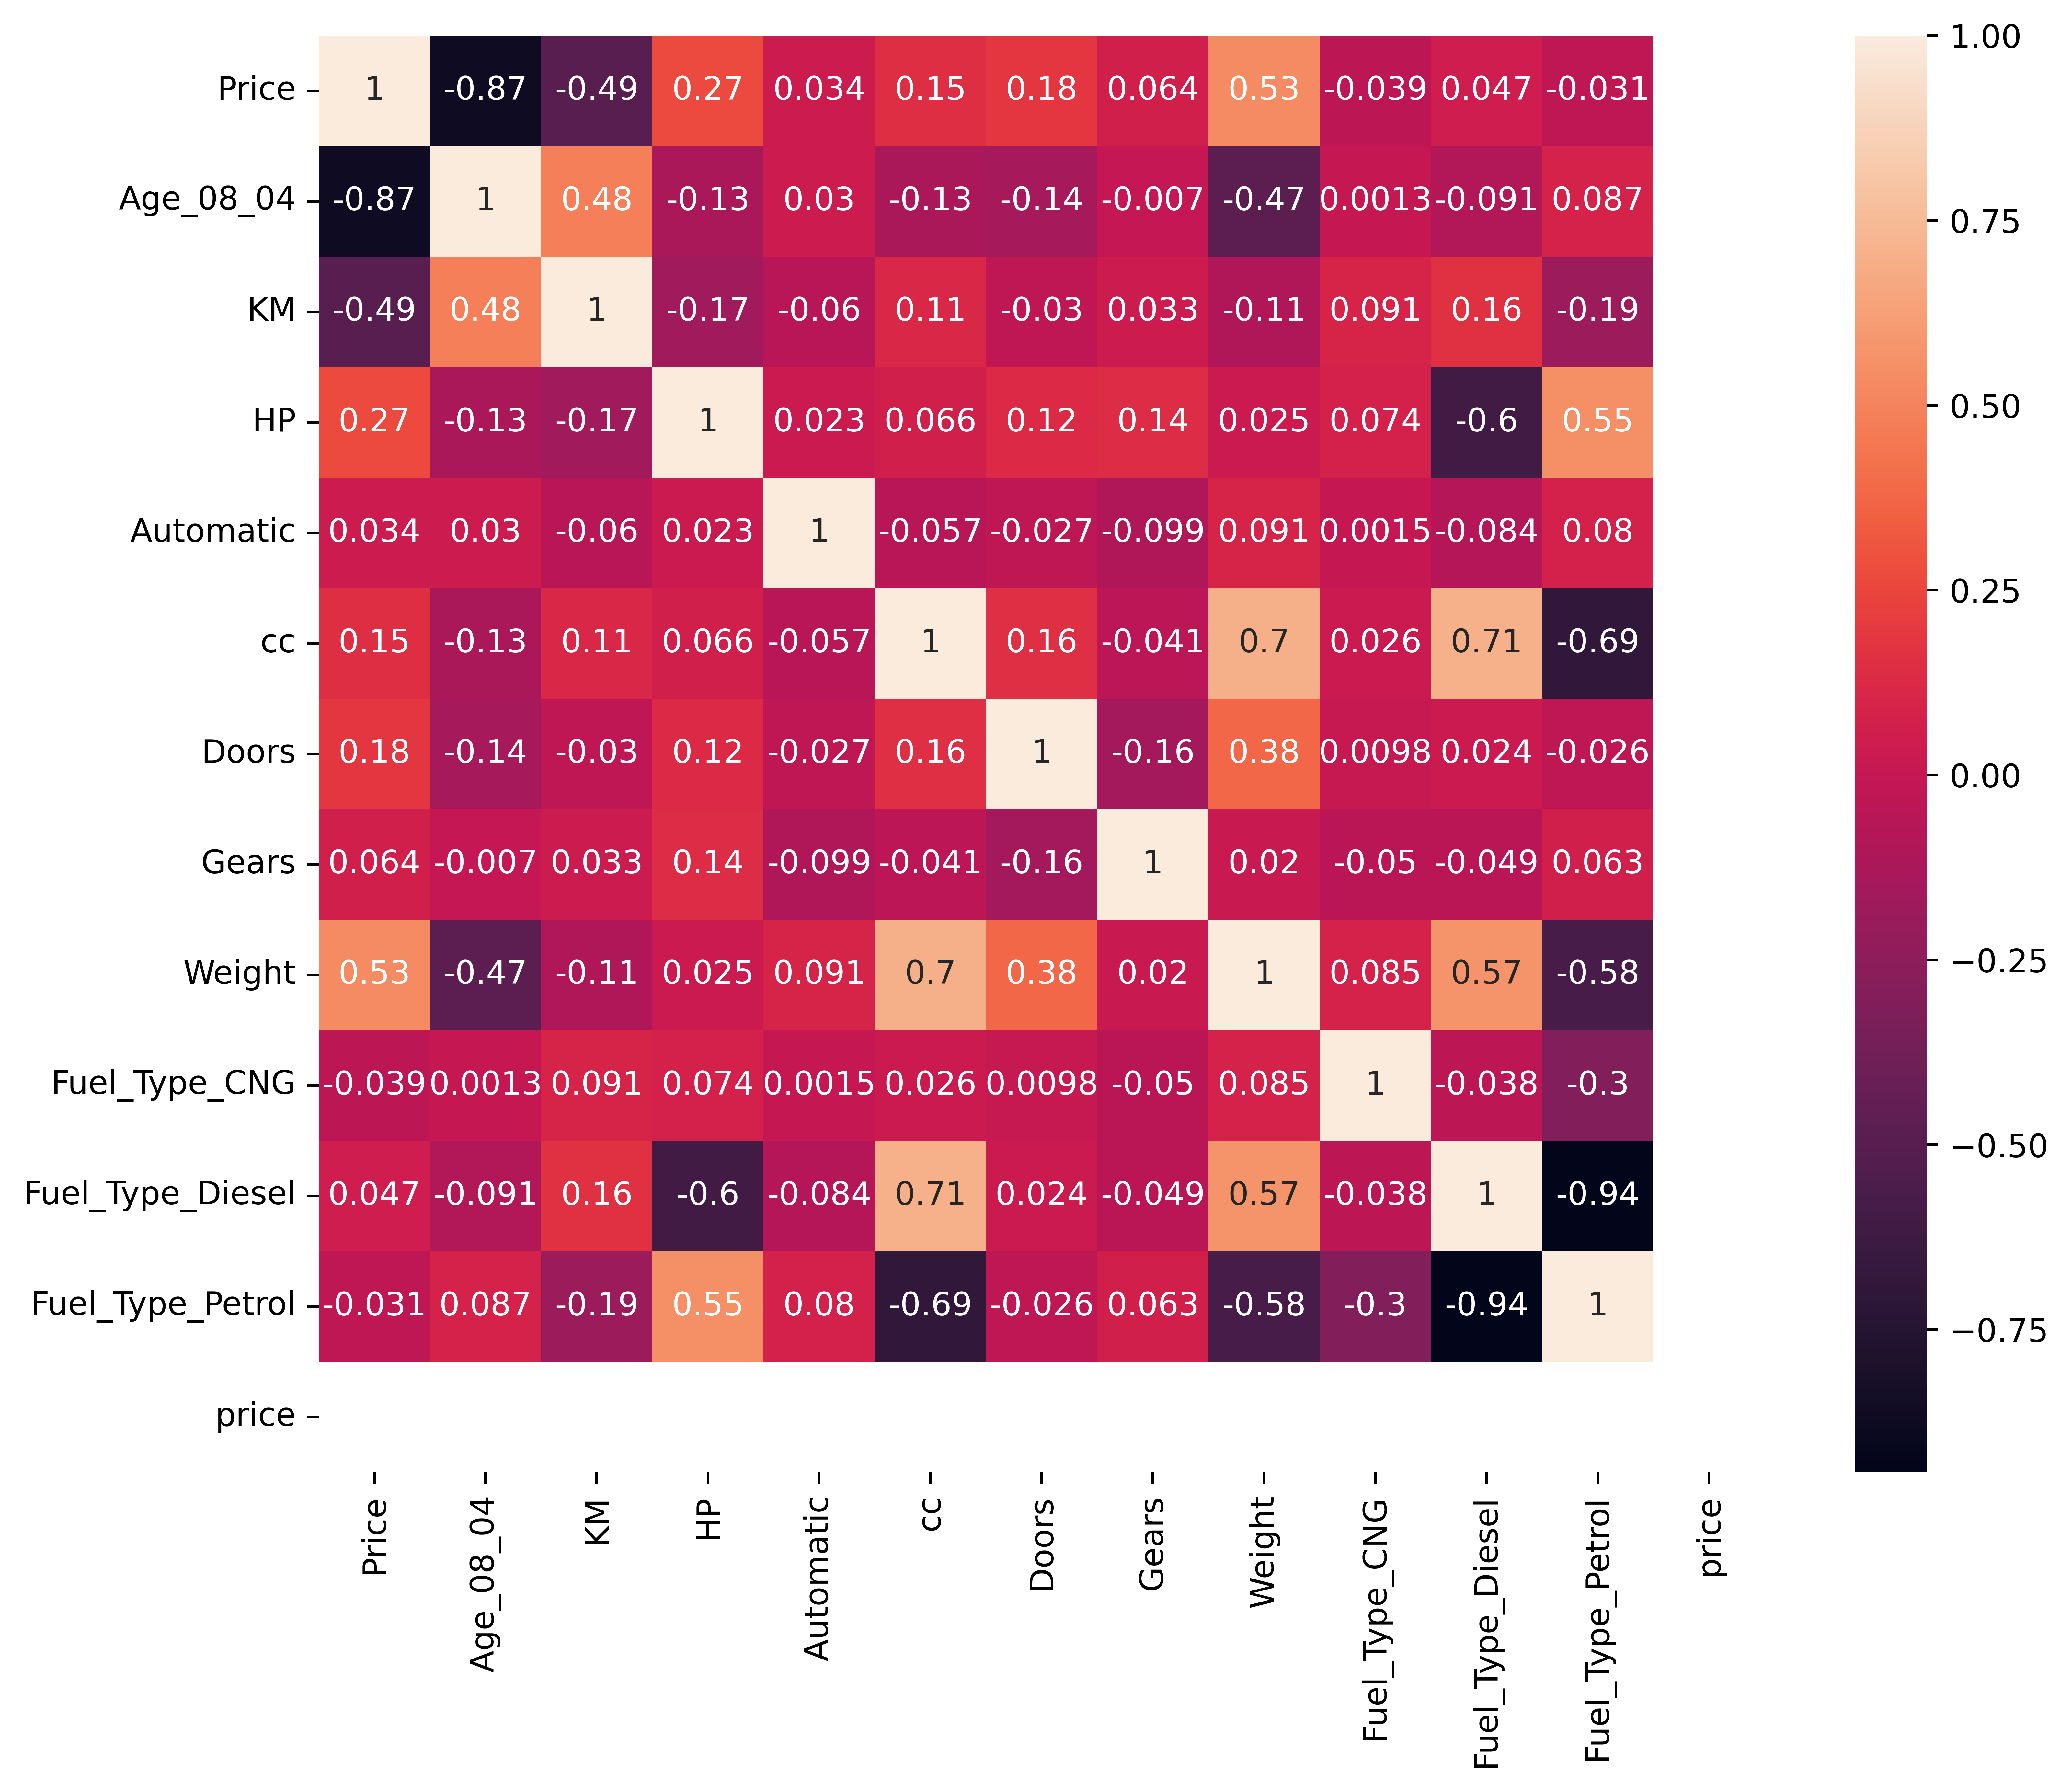

In [58]:
sns.heatmap(sc_df_final.corr(),annot=True)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
data=sc_df_final.drop(columns=['Price','price'],axis=1)

In [61]:
data

Age_08_04        KM        HP  Automatic        cc     Doors     Gears  \
0     -1.777268 -0.575958 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
1     -1.777268  0.116474 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
2     -1.723380 -0.716707 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
3     -1.615603 -0.548902 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
4     -1.400049 -0.802384 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
...         ...       ...       ...        ...       ...       ...       ...   
1430   0.701602 -1.281492 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
1431   0.863267 -1.322689 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
1432   0.809379 -1.375627 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
1433   0.755490 -1.378295 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
1434   1.078821 -1.829626  0.568103  -0.242983  0.055249  1.015659 -0.140475   

        Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0     1.530000      -0.109493          2.884126         -2.718789  
1     1.530000      -0.109493          2.884126         -2.718789  
2     1.530000      -0.109493          2.884126         -2.718789  
3     1.530000      -0.109493          2.884126         -2.718789  
4     1.530000      -0.109493          2.884126         -2.718789  
...        ...            ...               ...               ...  
1430 -0.905299      -0.109493         -0.346726          0.367811  
1431 -1.096747      -0.109493         -0.346726          0.367811  
1432 -1.096747      -0.109493         -0.346726          0.367811  
1433 -1.096747      -0.109493         -0.346726          0.367811  
1434  0.798582      -0.109493         -0.346726          0.367811  

[1435 rows x 11 columns]

In [62]:
data.isna().sum()

Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Gears               0
Weight              0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [63]:
vif=pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [64]:
vif['Features']=data.columns
vif

Features
0          Age_08_04
1                 KM
2                 HP
3          Automatic
4                 cc
5              Doors
6              Gears
7             Weight
8      Fuel_Type_CNG
9   Fuel_Type_Diesel
10  Fuel_Type_Petrol

In [65]:
range(len(data.columns))

range(0, 11)

In [66]:
values=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [67]:
values

[1.9311762947690767,
 1.4129606311376233,
 7.697829935042317,
 1.1439260880619029,
 9.398779908290384,
 1.3991776084769212,
 1.1883893420262637,
 4.212191747832981,
 inf,
 inf,
 inf]

In [68]:
#spliting data into x and y

In [69]:
x=sc_df_final.iloc[:,1:13]
x

Age_08_04        KM        HP  Automatic        cc     Doors     Gears  \
0     -1.777268 -0.575958 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
1     -1.777268  0.116474 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
2     -1.723380 -0.716707 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
3     -1.615603 -0.548902 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
4     -1.400049 -0.802384 -0.767351  -0.242983  0.760000 -1.084443 -0.140475   
...         ...       ...       ...        ...       ...       ...       ...   
1430   0.701602 -1.281492 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
1431   0.863267 -1.322689 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
1432   0.809379 -1.375627 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
1433   0.755490 -1.378295 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
1434   1.078821 -1.829626  0.568103  -0.242983  0.055249  1.015659 -0.140475   

        Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  price  
0     1.530000      -0.109493          2.884126         -2.718789    NaN  
1     1.530000      -0.109493          2.884126         -2.718789    NaN  
2     1.530000      -0.109493          2.884126         -2.718789    NaN  
3     1.530000      -0.109493          2.884126         -2.718789    NaN  
4     1.530000      -0.109493          2.884126         -2.718789    NaN  
...        ...            ...               ...               ...    ...  
1430 -0.905299      -0.109493         -0.346726          0.367811    NaN  
1431 -1.096747      -0.109493         -0.346726          0.367811    NaN  
1432 -1.096747      -0.109493         -0.346726          0.367811    NaN  
1433 -1.096747      -0.109493         -0.346726          0.367811    NaN  
1434  0.798582      -0.109493         -0.346726          0.367811    NaN  

[1435 rows x 12 columns]

In [70]:
y=sc_df_final['Price']
y

0       0.770368
1       0.839669
2       0.895109
3       1.172311
4       0.839669
          ...   
1430   -0.892845
1431    0.034396
1432   -0.615643
1433   -0.962145
1434   -1.045306
Name: Price, Length: 1435, dtype: float64

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)

In [72]:
x_train

Age_08_04        KM        HP  Automatic        cc     Doors     Gears  \
988    0.162717 -0.660488  0.568103  -0.242983  0.055249  1.015659 -0.140475   
906    0.486048 -0.259960  0.568103  -0.242983  0.055249 -1.084443 -0.140475   
1317   1.186598 -0.035135  0.568103  -0.242983  0.055249  1.015659 -0.140475   
817    0.324382  0.051449  0.568103  -0.242983  0.055249  1.015659 -0.140475   
660    0.486048  1.152601  0.568103  -0.242983 -0.140000 -1.084443  5.164307   
...         ...       ...       ...        ...       ...       ...       ...   
715    0.216605  0.560441  0.568103  -0.242983  0.055249 -0.034392 -0.140475   
905    0.647713 -0.259133  0.568103  -0.242983  0.055249 -1.084443 -0.140475   
1096   0.971044  1.503233 -1.969259  -0.242983  0.760000  1.015659 -0.140475   
235   -0.645610 -0.215374  0.568103  -0.242983  0.055249  1.015659 -0.140475   
1061   1.294375  2.439515 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   

        Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  price  
988  -0.043786      -0.109493         -0.346726          0.367811    NaN  
906  -0.426681      -0.109493         -0.346726          0.367811    NaN  
1317  0.243385      -0.109493         -0.346726          0.367811    NaN  
817  -0.713852      -0.109493         -0.346726          0.367811    NaN  
660  -0.139510      -0.109493         -0.346726          0.367811    NaN  
...        ...            ...               ...               ...    ...  
715  -0.713852      -0.109493         -0.346726          0.367811    NaN  
905  -0.330957      -0.109493         -0.346726          0.367811    NaN  
1096  1.200622      -0.109493          2.884126         -2.718789    NaN  
235   0.051938      -0.109493         -0.346726          0.367811    NaN  
1061 -1.096747      -0.109493         -0.346726          0.367811    NaN  

[1148 rows x 12 columns]

In [73]:
y_train

988    -0.213699
906    -0.490902
1317   -0.615643
817    -0.490902
660    -0.269140
          ...   
715    -0.546342
905    -0.269140
1096   -0.962145
235     0.063503
1061   -1.100746
Name: Price, Length: 1148, dtype: float64

In [74]:
x_train.join(y_train)

Age_08_04        KM        HP  Automatic        cc     Doors     Gears  \
988    0.162717 -0.660488  0.568103  -0.242983  0.055249  1.015659 -0.140475   
906    0.486048 -0.259960  0.568103  -0.242983  0.055249 -1.084443 -0.140475   
1317   1.186598 -0.035135  0.568103  -0.242983  0.055249  1.015659 -0.140475   
817    0.324382  0.051449  0.568103  -0.242983  0.055249  1.015659 -0.140475   
660    0.486048  1.152601  0.568103  -0.242983 -0.140000 -1.084443  5.164307   
...         ...       ...       ...        ...       ...       ...       ...   
715    0.216605  0.560441  0.568103  -0.242983  0.055249 -0.034392 -0.140475   
905    0.647713 -0.259133  0.568103  -0.242983  0.055249 -1.084443 -0.140475   
1096   0.971044  1.503233 -1.969259  -0.242983  0.760000  1.015659 -0.140475   
235   -0.645610 -0.215374  0.568103  -0.242983  0.055249  1.015659 -0.140475   
1061   1.294375  2.439515 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   

        Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  price  \
988  -0.043786      -0.109493         -0.346726          0.367811    NaN   
906  -0.426681      -0.109493         -0.346726          0.367811    NaN   
1317  0.243385      -0.109493         -0.346726          0.367811    NaN   
817  -0.713852      -0.109493         -0.346726          0.367811    NaN   
660  -0.139510      -0.109493         -0.346726          0.367811    NaN   
...        ...            ...               ...               ...    ...   
715  -0.713852      -0.109493         -0.346726          0.367811    NaN   
905  -0.330957      -0.109493         -0.346726          0.367811    NaN   
1096  1.200622      -0.109493          2.884126         -2.718789    NaN   
235   0.051938      -0.109493         -0.346726          0.367811    NaN   
1061 -1.096747      -0.109493         -0.346726          0.367811    NaN   

         Price  
988  -0.213699  
906  -0.490902  
1317 -0.615643  
817  -0.490902  
660  -0.269140  
...        ...  
715  -0.546342  
905  -0.269140  
1096 -0.962145  
235   0.063503  
1061 -1.100746  

[1148 rows x 13 columns]

In [75]:
x_test

Age_08_04        KM        HP  Automatic        cc     Doors     Gears  \
754    0.324382  0.312002 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   
435   -0.483945  0.272512  0.568103  -0.242983  0.055249  1.015659 -0.140475   
321   -1.022830 -0.867116  0.568103   4.115519  0.055249  1.015659 -0.140475   
1393   1.294375 -0.506744  0.568103  -0.242983  0.055249 -0.034392 -0.140475   
288   -0.699499 -0.665451  0.568103  -0.242983  0.055249  1.015659 -0.140475   
...         ...       ...       ...        ...       ...       ...       ...   
1114   0.809379  1.243001  0.568103  -0.242983  0.055249 -1.084443 -0.140475   
584   -0.322279 -1.037562  0.568103   4.115519  0.055249 -1.084443 -0.140475   
215   -1.238383  0.190171 -2.169577  -0.242983  0.760000 -1.084443 -0.140475   
135   -1.992822 -1.099332 -0.299942  -0.242983 -0.416182  1.015659 -0.140475   
797    0.432159  0.149987  0.568103  -0.242983  0.055249 -1.084443 -0.140475   

        Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  price  
754  -1.096747      -0.109493         -0.346726          0.367811    NaN  
435   0.894306       9.133004         -0.346726         -2.718789    NaN  
321   0.051938      -0.109493         -0.346726          0.367811    NaN  
1393 -0.713852      -0.109493         -0.346726          0.367811    NaN  
288   0.051938      -0.109493         -0.346726          0.367811    NaN  
...        ...            ...               ...               ...    ...  
1114 -0.426681      -0.109493         -0.346726          0.367811    NaN  
584   0.051938      -0.109493         -0.346726          0.367811    NaN  
215   0.626280      -0.109493          2.884126         -2.718789    NaN  
135   1.200622      -0.109493         -0.346726          0.367811   1.79  
797  -0.426681      -0.109493         -0.346726          0.367811    NaN  

[287 rows x 12 columns]

In [76]:
y_test

754    -0.546342
435     0.215964
321     0.895109
1393   -0.906705
288     0.617907
          ...   
1114   -1.170047
584     0.617907
215     0.770368
135     2.142519
797    -0.213699
Name: Price, Length: 287, dtype: float64

In [77]:
df=x_train.join(y_train)

In [78]:
df

Age_08_04        KM        HP  Automatic        cc     Doors     Gears  \
988    0.162717 -0.660488  0.568103  -0.242983  0.055249  1.015659 -0.140475   
906    0.486048 -0.259960  0.568103  -0.242983  0.055249 -1.084443 -0.140475   
1317   1.186598 -0.035135  0.568103  -0.242983  0.055249  1.015659 -0.140475   
817    0.324382  0.051449  0.568103  -0.242983  0.055249  1.015659 -0.140475   
660    0.486048  1.152601  0.568103  -0.242983 -0.140000 -1.084443  5.164307   
...         ...       ...       ...        ...       ...       ...       ...   
715    0.216605  0.560441  0.568103  -0.242983  0.055249 -0.034392 -0.140475   
905    0.647713 -0.259133  0.568103  -0.242983  0.055249 -1.084443 -0.140475   
1096   0.971044  1.503233 -1.969259  -0.242983  0.760000  1.015659 -0.140475   
235   -0.645610 -0.215374  0.568103  -0.242983  0.055249  1.015659 -0.140475   
1061   1.294375  2.439515 -1.034441  -0.242983 -0.651898 -1.084443 -0.140475   

        Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  price  \
988  -0.043786      -0.109493         -0.346726          0.367811    NaN   
906  -0.426681      -0.109493         -0.346726          0.367811    NaN   
1317  0.243385      -0.109493         -0.346726          0.367811    NaN   
817  -0.713852      -0.109493         -0.346726          0.367811    NaN   
660  -0.139510      -0.109493         -0.346726          0.367811    NaN   
...        ...            ...               ...               ...    ...   
715  -0.713852      -0.109493         -0.346726          0.367811    NaN   
905  -0.330957      -0.109493         -0.346726          0.367811    NaN   
1096  1.200622      -0.109493          2.884126         -2.718789    NaN   
235   0.051938      -0.109493         -0.346726          0.367811    NaN   
1061 -1.096747      -0.109493         -0.346726          0.367811    NaN   

         Price  
988  -0.213699  
906  -0.490902  
1317 -0.615643  
817  -0.490902  
660  -0.269140  
...        ...  
715  -0.546342  
905  -0.269140  
1096 -0.962145  
235   0.063503  
1061 -1.100746  

[1148 rows x 13 columns]

In [79]:
# model with all dependant variable(X)

In [80]:
model=smf.ols("Price~Age_08_04+	KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol",data=df).fit()

In [81]:
model.rsquared,model.aic

(0.8409549715966815, 1134.5091246785437)

In [82]:
# model without Fuel_Type_petrol column

In [83]:
model_=smf.ols("Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Fuel_Type_CNG+Fuel_Type_Diesel",data=df).fit()

In [84]:
model.rsquared, model.aic

(0.8409549715966815, 1134.5091246785437)

In [85]:
model.pvalues

Intercept            2.962421e-02
Age_08_04           5.197713e-224
KM                   5.378587e-07
HP                   3.283031e-49
Automatic            8.774959e-02
cc                   1.479206e-42
Doors                2.555716e-01
Gears                1.631276e-01
Weight               1.534890e-32
Fuel_Type_CNG        1.378475e-23
Fuel_Type_Diesel     1.512903e-27
Fuel_Type_Petrol     9.310042e-24
dtype: float64

In [86]:
# model without Fuel_Type_Disel column

In [87]:
model=smf.ols("Price~Age_08_04+	KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Petrol",data=df).fit()

In [88]:
model.pvalues

Intercept            2.962421e-02
Age_08_04           5.197713e-224
KM                   5.378587e-07
HP                   3.283031e-49
Automatic            8.774959e-02
cc                   1.479206e-42
Doors                2.555716e-01
Gears                1.631276e-01
Weight               1.534890e-32
Fuel_Type_CNG        8.927288e-31
Fuel_Type_Petrol     5.993294e-26
dtype: float64

In [89]:
#final model after best subset selection

In [90]:
model=smf.ols("Price~Age_08_04+	KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Petrol",data=df).fit()

In [91]:
model.rsquared, model.aic

(0.8409549715966815, 1134.5091246785437)

In [92]:
model.predict(x_test)

754    -0.596731
435     0.149075
321     0.904502
1393   -1.049931
288     0.579453
          ...   
1114   -0.726162
584     0.483113
215     0.239876
135     2.052231
797    -0.393374
Length: 287, dtype: float64

In [93]:
#model validation

In [94]:
import statsmodels.api as sm

In [95]:
model.resid

988    -0.180012
906    -0.092139
1317    0.032552
817    -0.029461
660    -0.047750
          ...   
715    -0.135231
905     0.199284
1096    0.053952
235    -0.446522
1061    0.300860
Length: 1148, dtype: float64

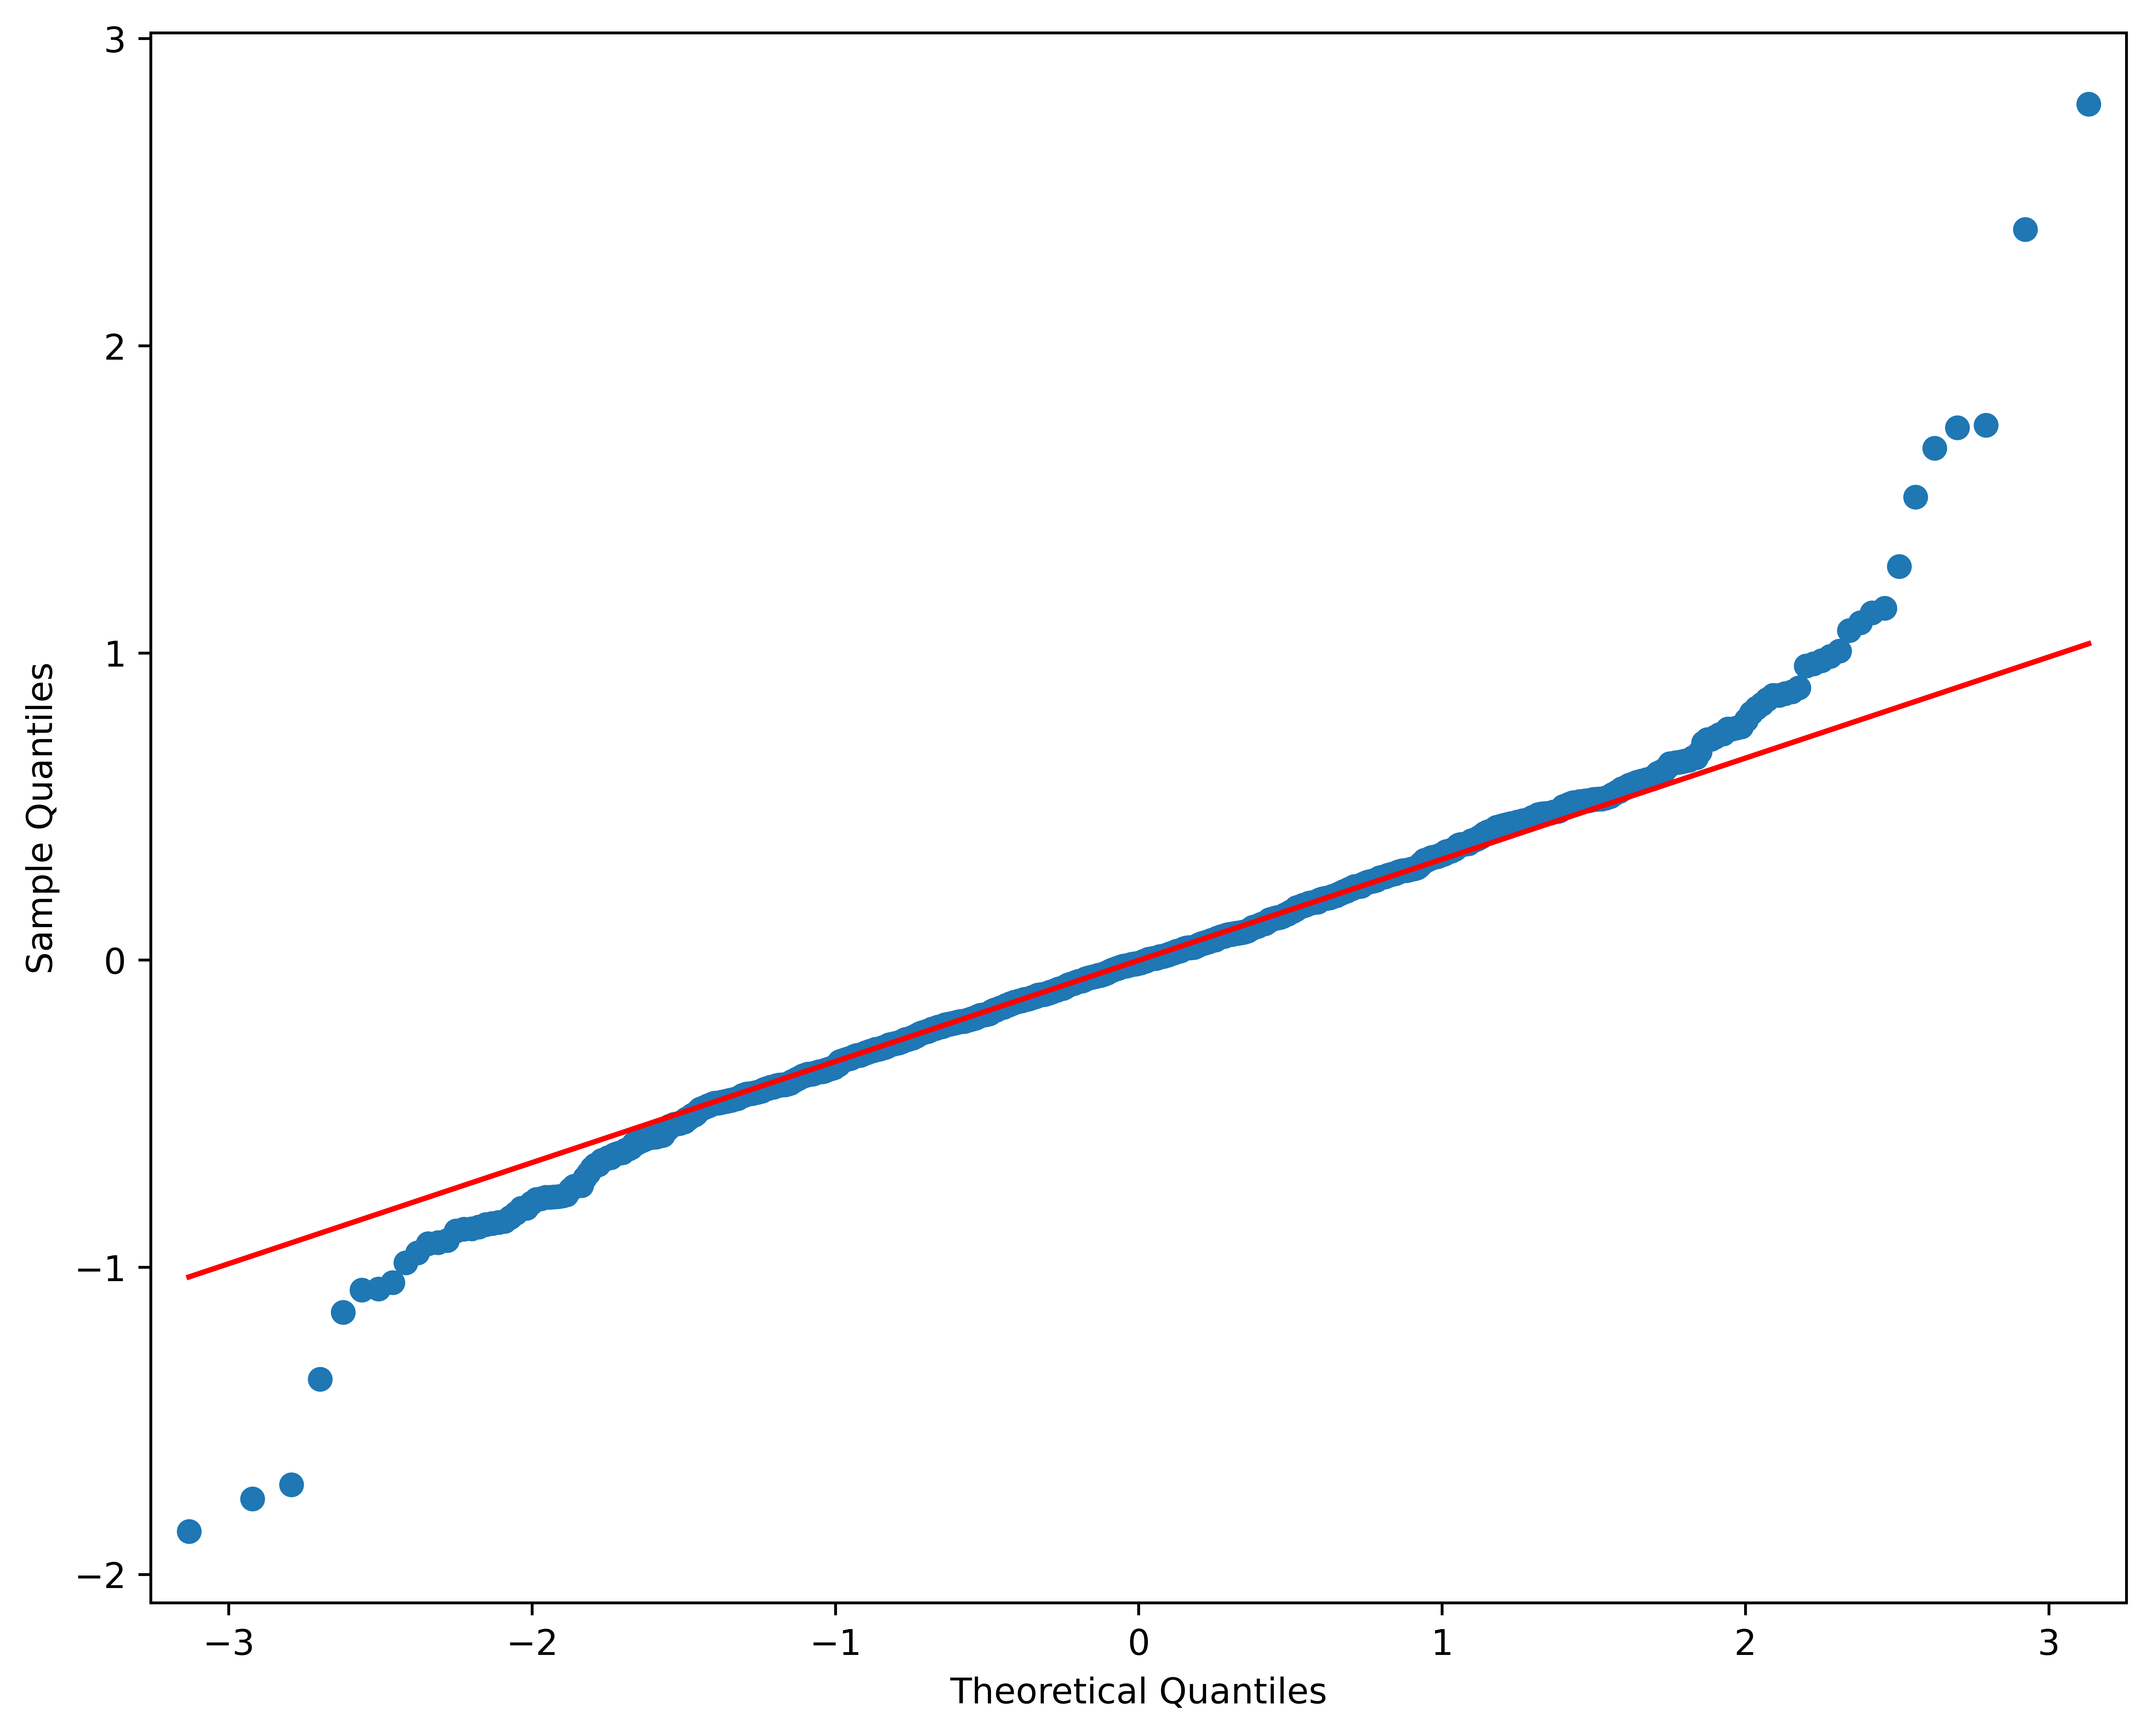

In [96]:
sm.qqplot(model.resid, line='q');

In [97]:
np.argmax(model.resid),np.max(model.resid)

(966, 2.7864697181227718)

In [98]:
model.fittedvalues

988    -0.033687
906    -0.398763
1317   -0.648195
817    -0.461441
660    -0.221390
          ...   
715    -0.411111
905    -0.468424
1096   -1.016097
235     0.510025
1061   -1.401606
Length: 1148, dtype: float64

In [99]:
model.resid

988    -0.180012
906    -0.092139
1317    0.032552
817    -0.029461
660    -0.047750
          ...   
715    -0.135231
905     0.199284
1096    0.053952
235    -0.446522
1061    0.300860
Length: 1148, dtype: float64

Text(0, 0.5, 'Errors')

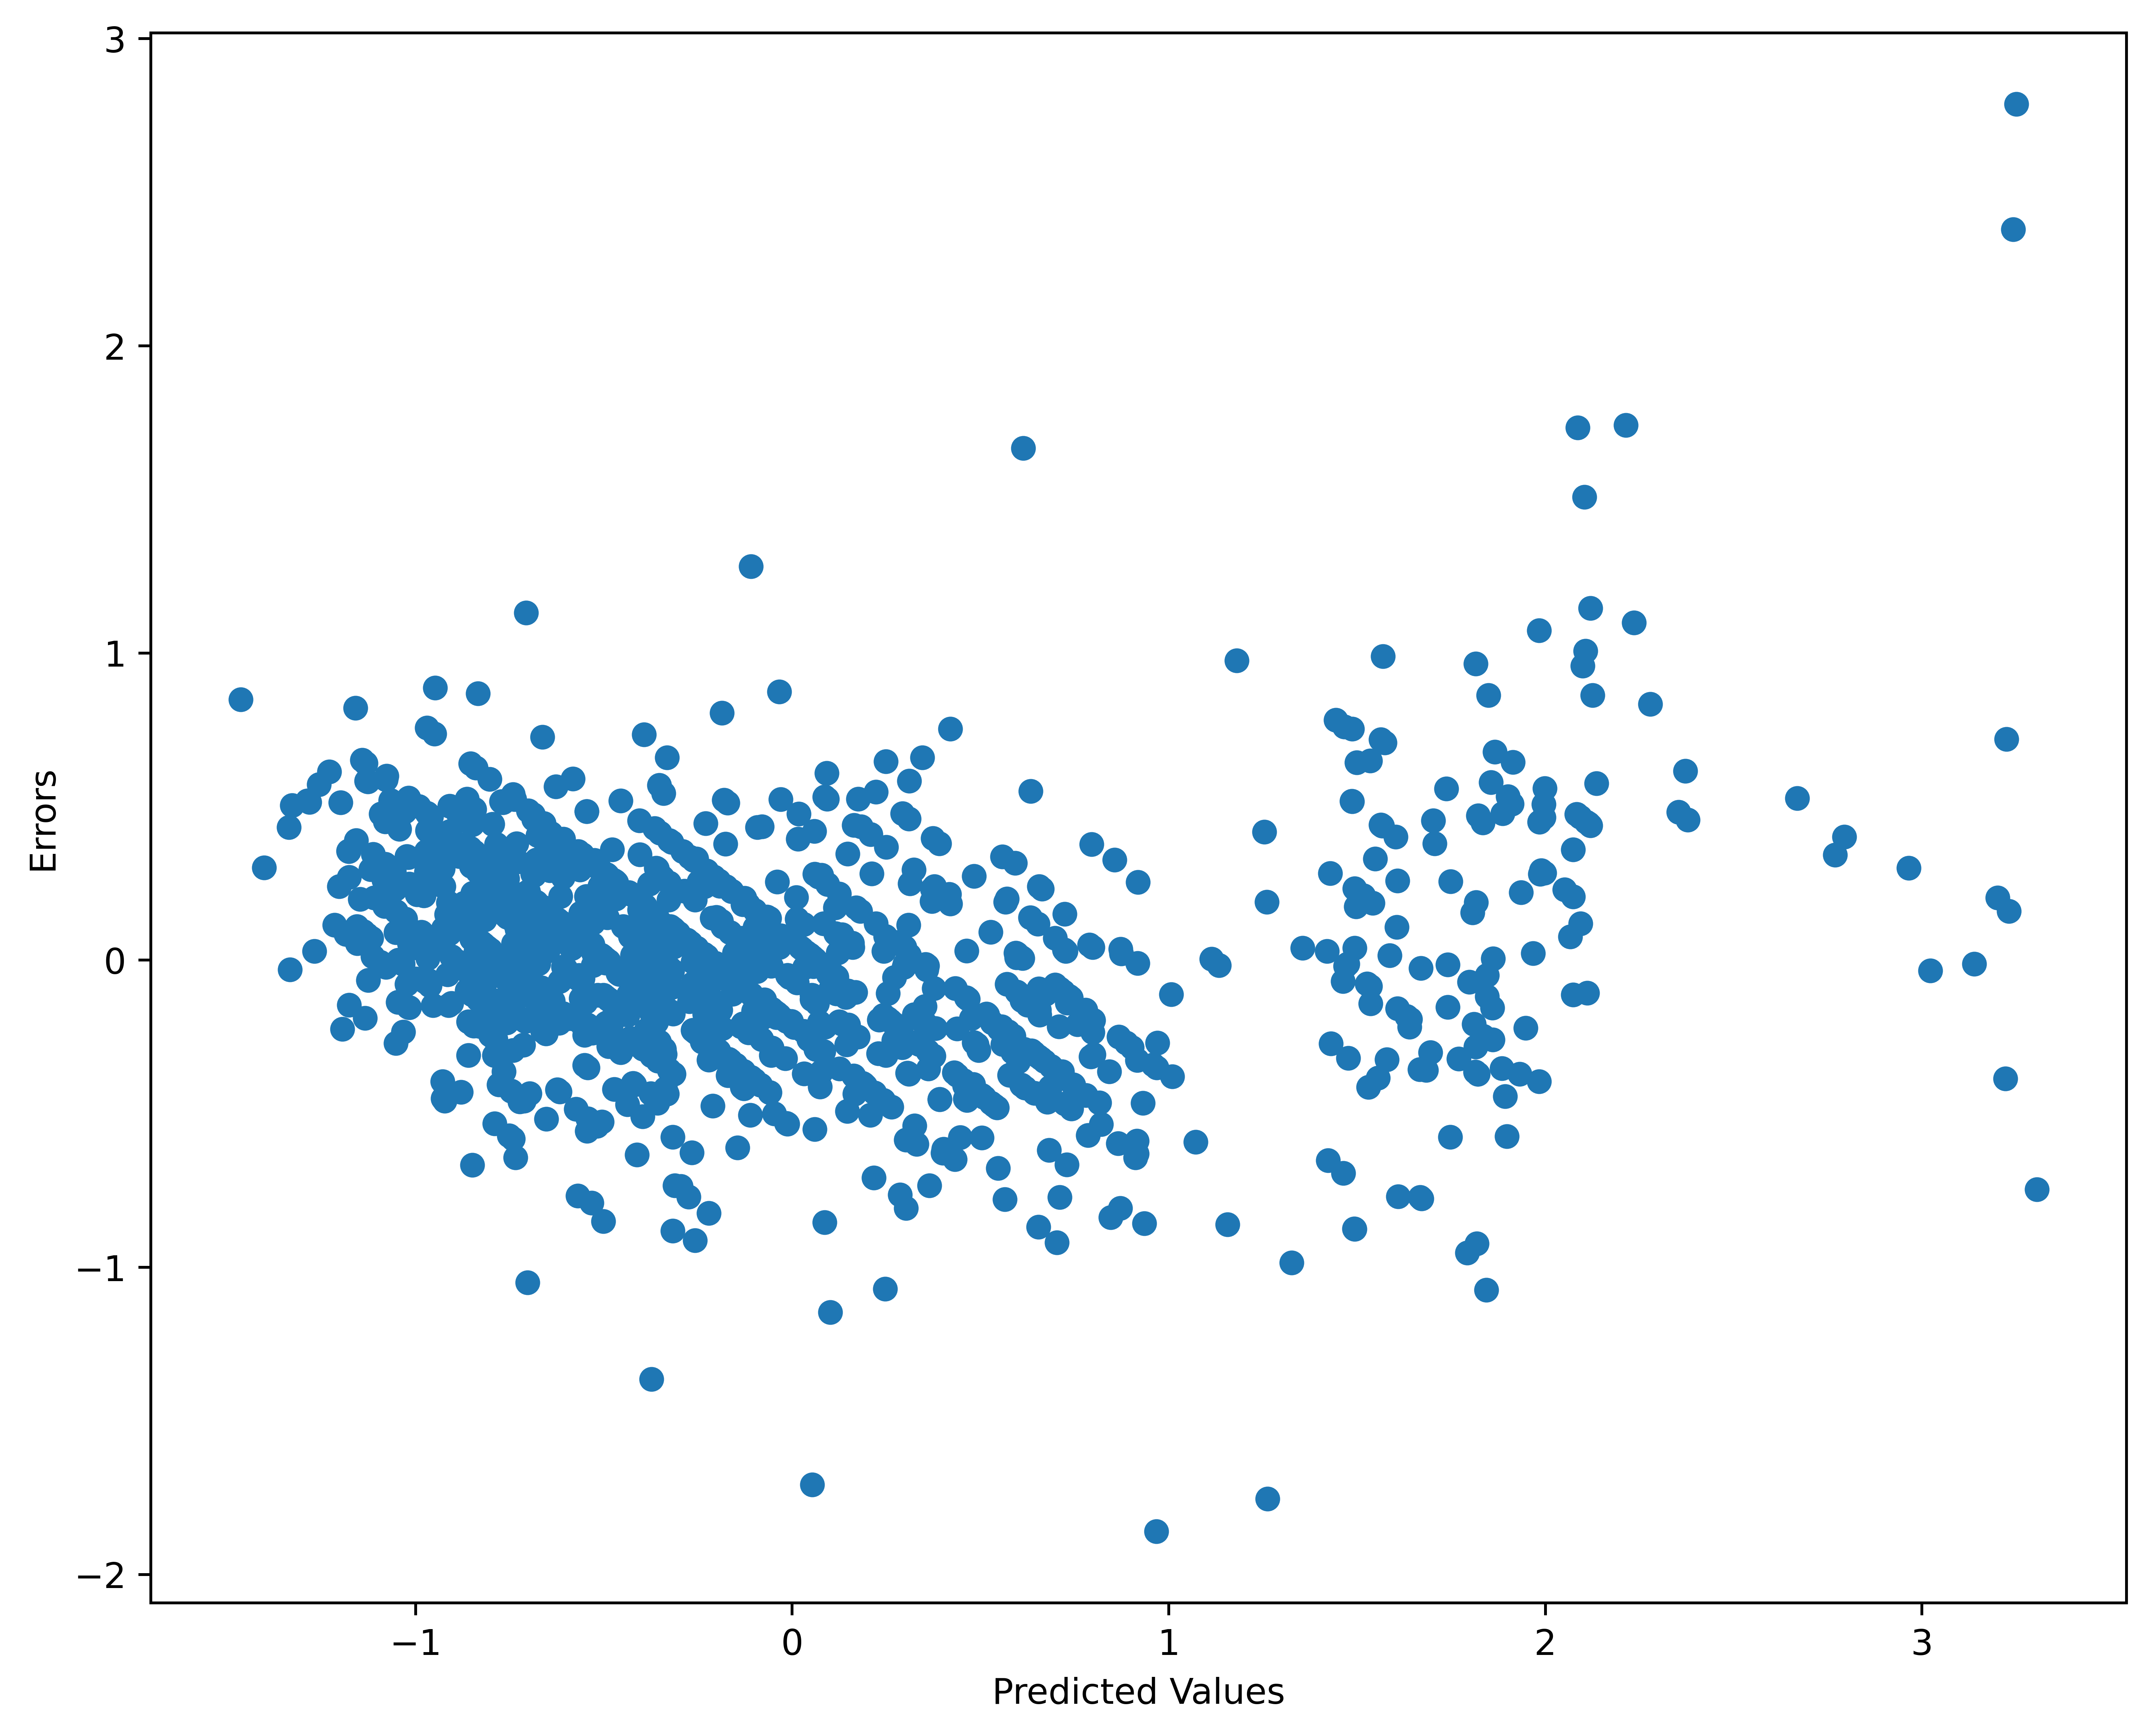

In [100]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')